In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import requests 
from datetime import timedelta
from config import api_key
from config import shared_secret
import matplotlib.pyplot as plt
import datetime
import csv
import os
import spotipy
from config import token, secret
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

In [2]:
#commenting out, so it's not run again
#Pulling in billboard data
#lyric_file = "billboard_lyrics_1964-2015.csv"
#lyric_df = pd.read_csv(lyric_file, skipinitialspace=False, encoding="ISO-8859-1")
#lyric_df.head()

In [3]:
#commenting out, so it's not run again
#creating lists of songs from Song column
#song_list = lyric_df["Song"].tolist()
#song_list

In [72]:
#commenting out, so it's not run again
#looking up spotify id's

#creating lists to store data
#song_name = []
#artist = []
#spotify_id = []

#looping through and pulling all songs that match the song name in the data set
#for id_lookup in song_list:
    #try:
#    time.sleep(10)

#    name = id_lookup

#    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#    results1 = spotify.search(q='track:' + name, type='track')
#    results1
#    count = 0

#    for x in np.arange(len(results1["tracks"]["items"])):

#            spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#            results = spotify.search(q='track:' + name, type='track')

#            song_name.append(results1["tracks"]["items"][count]["name"])

#            artist.append(results1["tracks"]["items"][count]["album"]["artists"][0]["name"])

#            spotify_id.append(results1["tracks"]["items"][count]["id"])
#            count += 1
        #except IndexError:
         #   next
#creating new dataframe
        #df['song name']  = song_name
        #df['artist']  = artist
        #df['id']  = spotify_id
#print(f'song {song_name} artist {artist} id {spotify_id}')

In [ ]:
#I took the dataframe and exported it, compared it to the original csv. Concatinated the artist and song names
#keeping only the records that matched the original data set.

In [6]:
#Importing new dataset with Spotify ID's(so song details can be looked up)
file = 'billboard_lyrics_1964-2015-merge work.csv'
df = pd.read_csv(file, skipinitialspace=False, encoding="ISO-8859-1")
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,spotify_ID
0,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,36ckFm0oicmvX8bWEErIHd
1,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,1Vzr9AOdHw65UHoK1Vuxls
2,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,6jWkZvd1URGktyTTwcpPpB
3,12,king of the road,roger miller,1965,trailer for sale or rent rooms to let fifty c...,1.0,5i58Eswru0w2z9rM8FcmDH
4,21,unchained melody,the righteous brothers,1965,oh my love my darling ive hungered for your t...,1.0,1jFhnVoJkcB4lf9tT0rSZS


In [10]:
#creating lists to create new dataframe and to run through API calls
spotify_ids = df["spotify_ID"].tolist()
songnames = df["Song"].tolist()
artistnames = df["Artist"].tolist()
rank = df["Rank"].tolist()
year = df["Year"].tolist()

In [11]:
#credentials needed for api call
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

#pulling only first 100 records to keep the api call from getting to many requests at once
x = 0
y = 99
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

#creating lists to store data retrieval
sng_nam = []
art_nam = []
rnk = []
yr = []
acousticness = []
danceability = []
duration_ms = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
mode = []
speechiness = []
tempo = []
time_signature = []
valence = []

#creating counter for looping through records
cnt = 0
for id_lookup in id10:
    #credentials for api call
    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)

    #appending results into the lists created
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    #adding to the counter
    cnt += 1

In [12]:
#running through results for the next set of 100

from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 100
y = 199
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [13]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 200
y = 299
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [14]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 300
y = 399
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [15]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 400
y = 499
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [16]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 500
y = 599
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [17]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 600
y = 699
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [18]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 700
y = 799
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
       
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [19]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 800
y = 899
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [20]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 900
y = 999
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [21]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1000
y = 1099
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [22]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1100
y = 1199
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [23]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1200
y = 1299
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [24]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1300
y = 1399
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [25]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1400
y = 1499
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [26]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1500
y = 1599
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [27]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1600
y = 1699
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [28]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1700
y = 1799
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
       
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [29]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1800
y = 1899
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [30]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 1900
y = 1999
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [31]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 2000
y = 2099
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
        
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [32]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 2100
y = 2199
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
     
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [33]:
#running through results for the next set of 100
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=token, client_secret=secret)

x = 2200
y = 2226
id10 = spotify_ids[x:y]
idsong = songnames[x:y]
idartist = artistnames[x:y]
idrank = rank[x:y]
idyear = year[x:y]

cnt = 0
for id_lookup in id10:

    spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = spotify.audio_features(id10)
    
    acousticness.append(results[cnt]["acousticness"])
    danceability.append(results[cnt]["danceability"])
    duration_ms.append(results[cnt]["duration_ms"])
    energy.append(results[cnt]["energy"])
    instrumentalness.append(results[cnt]["instrumentalness"])
    key.append(results[cnt]["key"])
    liveness.append(results[cnt]["liveness"])
    loudness.append(results[cnt]["loudness"])
    mode.append(results[cnt]["mode"])
    speechiness.append(results[cnt]["speechiness"])
    tempo.append(results[cnt]["tempo"])
    time_signature.append(results[cnt]["time_signature"])
    valence.append(results[cnt]["valence"])
    sng_nam.append(idsong[cnt])
    art_nam.append(idartist[cnt])
    rnk.append(idrank[cnt])
    yr.append(idyear[cnt])
    
    cnt += 1

In [34]:
#CREATING DATA FRAME FROM SPOTIFY ID'S
df = pd.DataFrame()
df['song_name'] = sng_nam
df['rank'] = rnk
df['year'] = yr
df['artist_name'] = art_nam
df['acousticness']  = acousticness
df['danceability']  = danceability
df['duration_ms']  = duration_ms
df['energy']  = energy
df['instrumentalness']  = instrumentalness
df['key']  = key
df['liveness']  = liveness
df['loudness']  = loudness
df['mode']  = mode
df['speechiness']  = speechiness
df['tempo']  = tempo
df['time_signature']  = time_signature
df['valence']  = valence

df

,song_name,rank,year,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,you were on my mind,4,1965,we five,0.48500,0.510,155960,0.565,0.000000,1,0.0476,-8.105,0,0.0500,143.381,4,0.7000
1,crying in the chapel,9,1965,elvis presley,0.94000,0.404,143267,0.246,0.000030,11,0.2970,-13.812,1,0.0410,71.274,4,0.2810
2,my girl,10,1965,the temptations,0.62500,0.579,165000,0.419,0.000000,0,0.0981,-10.720,1,0.0346,104.564,4,0.6730
3,king of the road,12,1965,roger miller,0.34900,0.724,148468,0.257,0.000003,6,0.0970,-16.281,1,0.0783,121.409,4,0.6920
4,unchained melody,21,1965,the righteous brothers,0.51700,0.367,215840,0.215,0.000000,0,0.6180,-16.652,1,0.0288,98.742,3,0.2660
5,cast your fate to the wind,26,1965,sounds orchestral,0.39400,0.559,195000,0.310,0.794000,8,0.1080,-13.499,1,0.0408,128.691,4,0.3110
6,eve of destruction,29,1965,barry mcguire,0.35200,0.585,216813,0.414,0.000000,2,0.1020,-13.494,1,0.0442,116.483,4,0.7730
7,hang on sloopy,30,1965,the mccoys,0.16700,0.764,231800,0.516,0.000000,7,0.0723,-12.099,1,0.0334,115.255,4,0.9360
8,red roses for a blue lady,32,1965,bert kaempfert,0.87200,0.613,139653,0.306,0.687000,7,0.1420,-12.448,1,0.0319,117.724,4,0.3500
9,the name game,35,1965,shirley ellis,0.20100,0.678,164867,0.811,0.000004,5,0.1780,-7.419,0,0.1230,163.761,4,0.9280


In [36]:
#converting the duration from milliseconds to minutes
df['duration_minutes']  = df['duration_ms']/60000

In [37]:
df

,song_name,rank,year,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
0,you were on my mind,4,1965,we five,0.48500,0.510,155960,0.565,0.000000,1,0.0476,-8.105,0,0.0500,143.381,4,0.7000,2.599333
1,crying in the chapel,9,1965,elvis presley,0.94000,0.404,143267,0.246,0.000030,11,0.2970,-13.812,1,0.0410,71.274,4,0.2810,2.387783
2,my girl,10,1965,the temptations,0.62500,0.579,165000,0.419,0.000000,0,0.0981,-10.720,1,0.0346,104.564,4,0.6730,2.750000
3,king of the road,12,1965,roger miller,0.34900,0.724,148468,0.257,0.000003,6,0.0970,-16.281,1,0.0783,121.409,4,0.6920,2.474467
4,unchained melody,21,1965,the righteous brothers,0.51700,0.367,215840,0.215,0.000000,0,0.6180,-16.652,1,0.0288,98.742,3,0.2660,3.597333
5,cast your fate to the wind,26,1965,sounds orchestral,0.39400,0.559,195000,0.310,0.794000,8,0.1080,-13.499,1,0.0408,128.691,4,0.3110,3.250000
6,eve of destruction,29,1965,barry mcguire,0.35200,0.585,216813,0.414,0.000000,2,0.1020,-13.494,1,0.0442,116.483,4,0.7730,3.613550
7,hang on sloopy,30,1965,the mccoys,0.16700,0.764,231800,0.516,0.000000,7,0.0723,-12.099,1,0.0334,115.255,4,0.9360,3.863333
8,red roses for a blue lady,32,1965,bert kaempfert,0.87200,0.613,139653,0.306,0.687000,7,0.1420,-12.448,1,0.0319,117.724,4,0.3500,2.327550
9,the name game,35,1965,shirley ellis,0.20100,0.678,164867,0.811,0.000004,5,0.1780,-7.419,0,0.1230,163.761,4,0.9280,2.747783


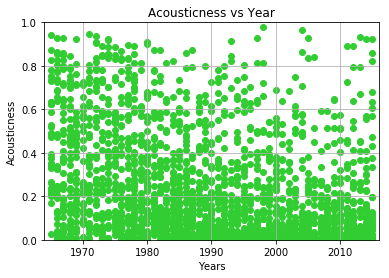

In [92]:
#Scatterplot Year vs Acousticness
plt.scatter(df["year"], df["acousticness"], color = 'limegreen')
plt.title('Acousticness vs Year')
plt.xlabel('Years')
plt.ylabel('Acousticness')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Acousticness vs Year.png")
plt.show()

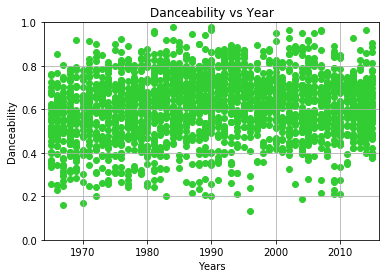

In [93]:
#Scatterplot Danceability vs Year
plt.scatter(df["year"], df["danceability"], color = 'limegreen')
plt.title('Danceability vs Year')
plt.xlabel('Years')
plt.ylabel('Danceability')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Danceability vs Year.png")
plt.show()

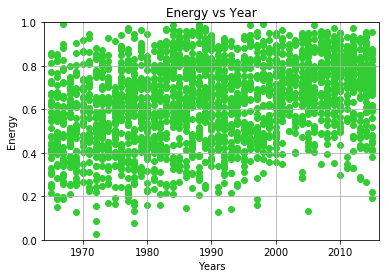

In [94]:
#Scatterplot Energy vs Year
plt.scatter(df["year"], df["energy"], color = 'limegreen')
plt.title('Energy vs Year')
plt.xlabel('Years')
plt.ylabel('Energy')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Energy vs Year.png")
plt.show()

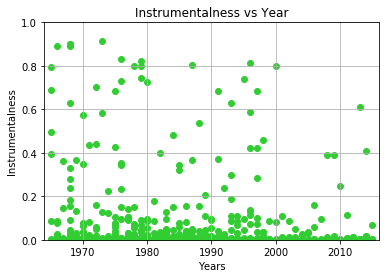

In [96]:
#Scatterplot Instrumentalness vs Year
plt.scatter(df["year"], df["instrumentalness"],color = 'limegreen')
plt.title('Instrumentalness vs Year')
plt.xlabel('Years')
plt.ylabel('Instrumentalness')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Instrumentalness vs Year.png")
plt.show()

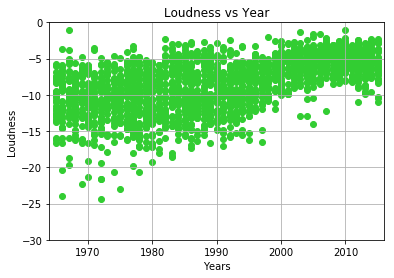

In [206]:
#Scatterplot Loudness vs Year
plt.scatter(df["year"], df["loudness"],color = 'limegreen')
plt.title('Loudness vs Year')
plt.xlabel('Years')
plt.ylabel('Loudness')
plt.xlim(1964,2016)
plt.ylim(-30,0)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Loudness vs Year.png")
plt.show()

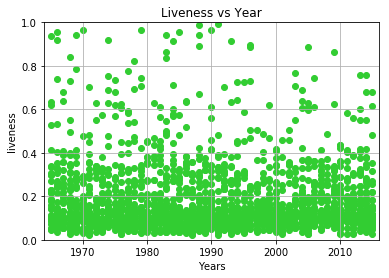

In [99]:
#Scatterplot Liveness vs Year
plt.scatter(df["year"], df["liveness"],color = 'limegreen')
plt.title('Liveness vs Year')
plt.xlabel('Years')
plt.ylabel('Liveness')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Liveness vs Year.png")
plt.show()

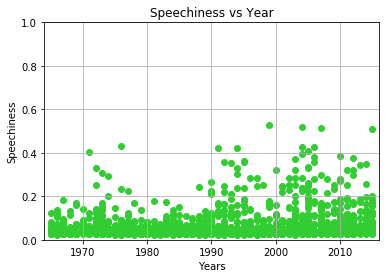

In [100]:
#Scatterplot Speechiness vs Year
plt.scatter(df["year"], df["speechiness"],color = 'limegreen')
plt.title('Speechiness vs Year')
plt.xlabel('Years')
plt.ylabel('Speechiness')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Speechiness vs Year.png")
plt.show()

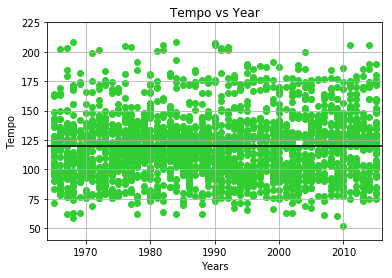

In [101]:
#Scatterplot Tempo vs Year
plt.scatter(df["year"], df["tempo"],color = 'limegreen')
plt.title('Tempo vs Year')
plt.xlabel('Years')
plt.ylabel('Tempo')
plt.xlim(1964,2016)
plt.ylim(40,225)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Tempo vs Year.png")
plt.show()

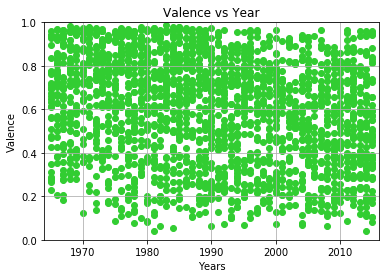

In [103]:
#Scatterplot Valence vs Year
plt.scatter(df["year"], df["valence"], color = 'limegreen')
plt.title('Valence vs Year')
plt.xlabel('Years')
plt.ylabel('Valence')
plt.xlim(1964,2016)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Valence vs Year.png")
plt.show()

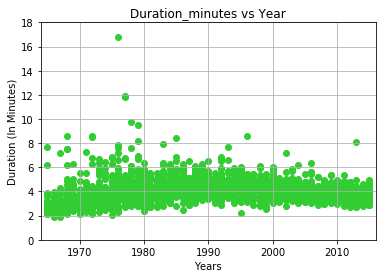

In [185]:
#Scatterplot Duration_minutes vs Year
plt.scatter(df["year"], df["duration_minutes"], color = 'limegreen')
plt.title('Duration_minutes vs Year')
plt.xlabel('Years')
plt.ylabel('Duration (In Minutes)')
plt.xlim(1964,2016)
plt.ylim(0,18)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Duration_minutes vs Year.png")
plt.show()

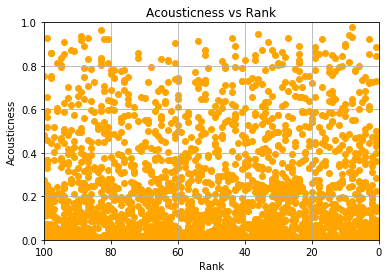

In [192]:
#Scatter Rank vs Year
plt.scatter(df["rank"], df["acousticness"],color = 'orange')
plt.title('Acousticness vs Rank')
plt.xlabel('Rank')
plt.ylabel('Acousticness')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Acousticness vs Rank.png")
plt.show()

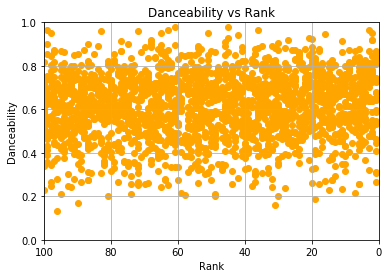

In [193]:
#Scatter Danceability vs Rank
plt.scatter(df["rank"], df["danceability"], color="orange")
plt.title('Danceability vs Rank')
plt.xlabel('Rank')
plt.ylabel('Danceability')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Danceability vs Rank.png")
plt.show()

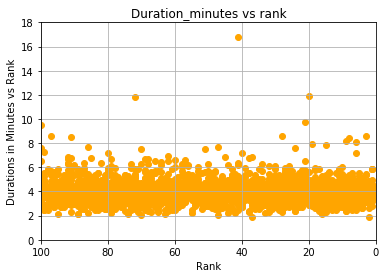

In [194]:
#Scatter Duration_minutes vs rank
plt.scatter(df["rank"], df["duration_minutes"], color="orange")
plt.title('Duration_minutes vs rank')
plt.xlabel('Rank')
plt.ylabel('Durations in Minutes vs Rank')
plt.xlim(100,0)
plt.ylim(0,18)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Duration_minutes vs rank.png")
plt.show()

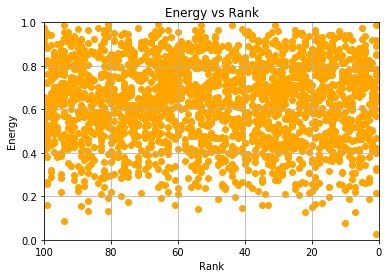

In [195]:
#Scatter Energy vs Rank
plt.scatter(df["rank"], df["energy"], color = "orange")
plt.title('Energy vs Rank')
plt.xlabel('Rank')
plt.ylabel('Energy')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Energy vs Rank.png")
plt.show()

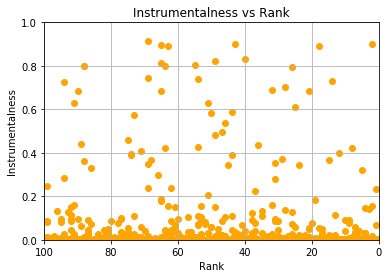

In [196]:
#Scatter Instrumentalness vs Rank
plt.scatter(df["rank"], df["instrumentalness"], color = "orange")
plt.title('Instrumentalness vs Rank')
plt.xlabel('Rank')
plt.ylabel('Instrumentalness')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Instrumentalness vs Rank.png")
plt.show()

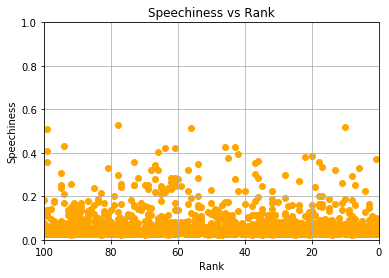

In [197]:
#Scatter Speechiness vs Rank
plt.scatter(df["rank"], df["speechiness"],color = "orange")
plt.title('Speechiness vs Rank')
plt.xlabel('Rank')
plt.ylabel('Speechiness')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Speechiness vs Rank.png")
plt.show()

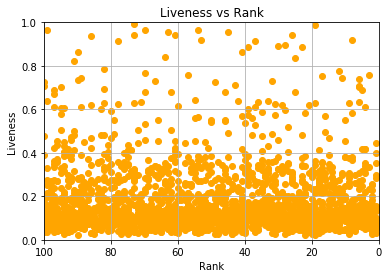

In [198]:
#Scatter Liveness vs Rank
plt.scatter(df["rank"], df["liveness"],color = "orange")
plt.title('Liveness vs Rank')
plt.xlabel('Rank')
plt.ylabel('Liveness')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Liveness vs Rank.png")
plt.show()

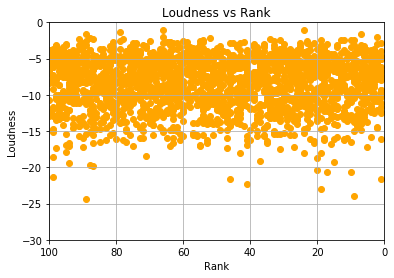

In [205]:
#Scatter Loudness vs Rank
plt.scatter(df["rank"], df["loudness"],color = "orange")
plt.title('Loudness vs Rank')
plt.xlabel('Rank')
plt.ylabel('Loudness')
plt.xlim(100,0)
plt.ylim(-30,0)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Loudness vs Rank.png")
plt.show()

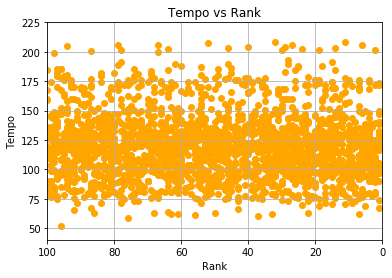

In [200]:
#Scatter Tempo vs Rank
plt.scatter(df["rank"], df["tempo"],color = "orange")
plt.title('Tempo vs Rank')
plt.xlabel('Rank')
plt.ylabel('Tempo')
plt.xlim(100,0)
plt.ylim(40,225)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Tempo vs Rank.png")
plt.show()

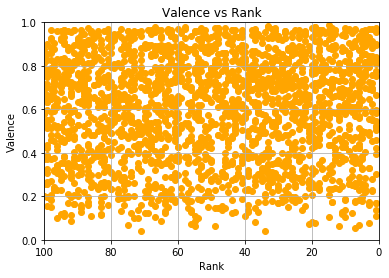

In [201]:
#Scatter Valence vs Rank
plt.scatter(df["rank"], df["valence"],color = "orange")
plt.title('Valence vs Rank')
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.xlim(100,0)
plt.ylim(0,1)
plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("Output/Valence vs Rank.png")
plt.show()